In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
df = pd.read_csv(r"C:\Users\dines\OneDrive\Documents\code-datasets\UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [29]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [30]:
print(df[(df['Category'] == '') | (df['Category'] == None)])
print(df[(df['Resume'] == '') | (df['Resume'] == None)])

Empty DataFrame
Columns: [Category, Resume]
Index: []
Empty DataFrame
Columns: [Category, Resume]
Index: []


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [32]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [33]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

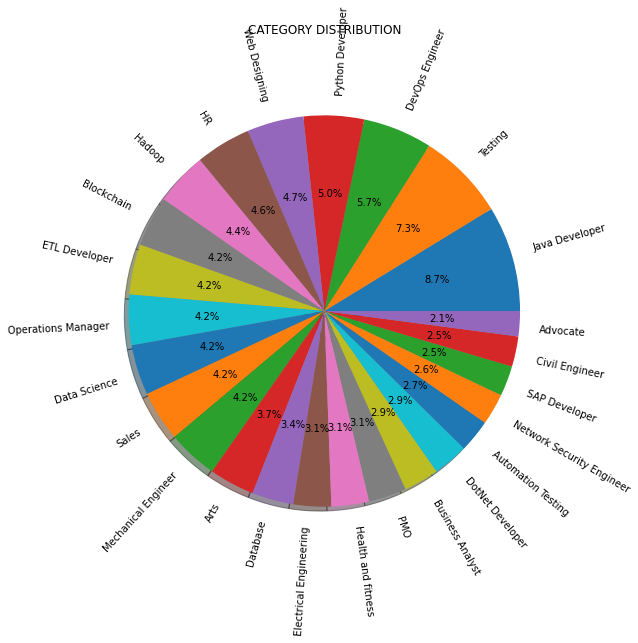

In [34]:
from matplotlib.gridspec import GridSpec
GridSpec(2, 2)
plt.figure(figsize=(22, 22))
the_grid = GridSpec(2, 2)
plt.xticks(fontsize=10)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(x = df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%', shadow=True, rotatelabels=True, radius=0.9)
plt.show()

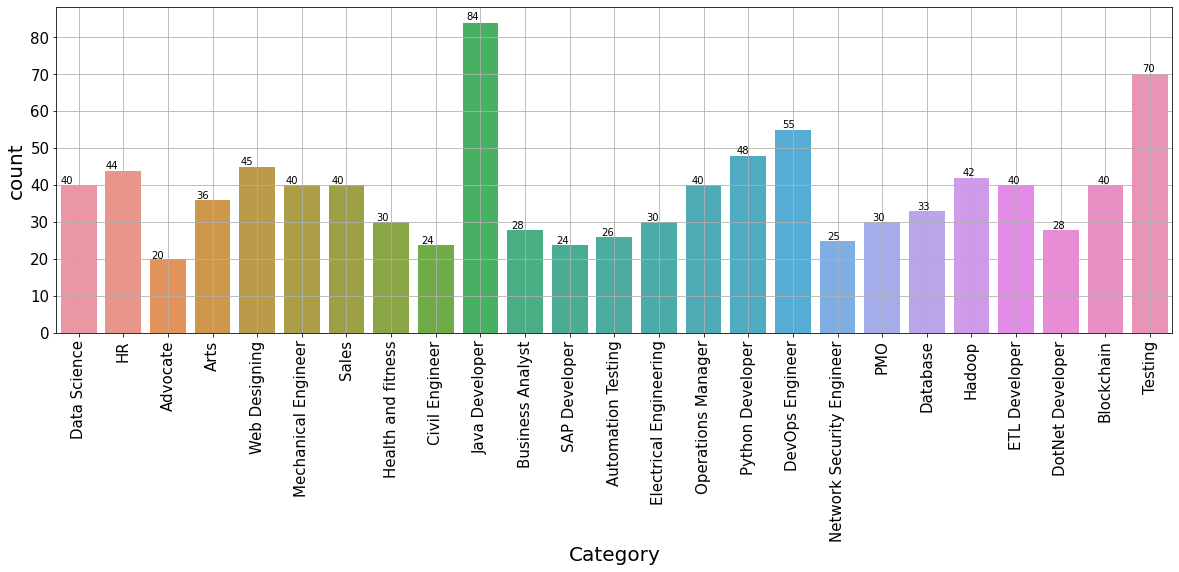

In [35]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('',fontsize=20)
plt.ylabel('', fontsize=20)
ax = sns.countplot(x='Category', data=df)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.01, i.get_height()*1.01))
plt.grid()

In [36]:
df['Resume'].head()

0    Skills * Programming Languages: Python (pandas...
1    Education Details \r\nMay 2013 to May 2017 B.E...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Education Details \r\n MCA   YMCAUST,  Faridab...
Name: Resume, dtype: object

In [37]:
df['Cleaned_data'] = ''
df.head()

,Category,Resume,Cleaned_data
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [38]:
stwords =  stopwords.words('english')
for i in range(len(df['Resume'])):
    data  = re.sub('[^A-Za-z0-9]',' ', df['Resume'][i])
    data = re.sub('\s+', ' ', data).lower()
    df['Cleaned_data'][i] = ' '.join([w for w in data.split() if w not in stwords])
df.head()

,Category,Resume,Cleaned_data
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [39]:
df['Labels'] = ''
df.head()

,Category,Resume,Cleaned_data,Labels
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,


In [40]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Category'])
df.head()

,Category,Resume,Cleaned_data,Labels
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


In [41]:
tfidf = TfidfVectorizer(max_features=500)
tfidf.fit(df['Cleaned_data'].values)
X = tfidf.transform(df['Category'].values)

In [42]:
y = df['Labels'].values

In [43]:
X, y = shuffle(X, y)

In [44]:
X.shape

(962, 500)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [46]:
X_train.shape, X_test.shape

((769, 500), (193, 500))

In [47]:
y_train.shape, y_test.shape

((769,), (193,))

In [48]:
cnc = OneVsRestClassifier(KNeighborsClassifier())

In [49]:
cnc.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [50]:
pred = cnc.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
accuracy_score(pred, y_test)

0.9792746113989638